In [2]:
# Sentiment Analysis program that parses the tweets from Twitter.

In [3]:
#Libraries
import tweepy
from textblob import TextBlob #for sentiment analysis
import pandas as pd
import matplotlib.pyplot as plt
import re #to work with string data
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [4]:
#Import the Twitter APT
APIKey="1BbDH8pONUrBxUxmLXAPxXapZ"
APISecretKey="3qPqCBpTxohHQYlX0HlNTJcixd2fvd2FQkGnbQKdkJiWUFPJfw"
AccessToken="1379319975006007298-yxyTrc3pl3vZenoXQJyRXQyNLVeOuO"
AccessTokenSecret="z0bMcojmINMAJferAkGHMn5ZBvaJOJYHbzltdTriaSoaP"

In [5]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(APIKey,APISecretKey)
authenticate.set_access_token(AccessToken,AccessTokenSecret)
api = tweepy.API(authenticate)

In [6]:
posts = api.user_timeline(screen_name = 'Technology', count = 100, lang = 'eg', tweet_mode = 'extended')
i = 1
for tweet in posts: 
  print(str(i) +') ' + tweet.full_text + '\n')
  i+=1

1) Market Pricing in Short Disruption From Pipeline Hack: Clearview's Kevin Book https://t.co/U6jQQYw1ER

2) Forty-four attorneys general sent a letter to Mark Zuckerberg asking him to abandon plans to create a version of Instagram for children under 13 https://t.co/ePzp0G1XrI

3) IT firm AgileThought has reached a deal with a Mexico-focused SPAC https://t.co/3EVai5I1s7

4) Babel Finance, a Chinese startup offering financial services to cryptocurrency clients, raises $40 million from investors including Sequoia Capital China and Tiger Global https://t.co/uux7HLRl7X

5) Amazon is selling bonds to refinance debt and buy back stock in its first offering in nearly a year https://t.co/d3yZsPIMTQ

6) Veteran traders take lessons learned in Wall Street markets to the wild west that is crypto https://t.co/KeHGawJH6R

7) Sports streaming service DAZN had the biggest increase in video streaming last week as it featured a boxing match between Saul “Canelo” Alvarez and Billy Joe Saunders https://t

In [7]:
# Creating a DataFrame with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts],columns = ['Tweets'])
df

,Tweets
0,Market Pricing in Short Disruption From Pipeli...
1,Forty-four attorneys general sent a letter to ...
2,IT firm AgileThought has reached a deal with a...
3,"Babel Finance, a Chinese startup offering fina..."
4,Amazon is selling bonds to refinance debt and ...
...,...
95,RT @neweconforum: The Bloomberg New Economy Ad...
96,Calls return to revoke the legal shield that p...
97,RT @BW: The RV business boomed during Covid. S...
98,With the chip shortage stretching into its fif...


In [8]:
# Cleaning the data by making a function
def cleanText(text):
  text = re.sub('@[AaZa-z0-9]+','',text) #removing mentions
  text = re.sub("#",'',text)  #removing #
  text = re.sub('Rt[\s]+','',text)  #removing Retweets
  tezt = re.sub('https?:\/\/\S+','',text)  #removing links
  return text

In [9]:
# applying the function to clean tweets
df['Tweets'] = df['Tweets'].apply(cleanText)

In [10]:
df

,Tweets
0,Market Pricing in Short Disruption From Pipeli...
1,Forty-four attorneys general sent a letter to ...
2,IT firm AgileThought has reached a deal with a...
3,"Babel Finance, a Chinese startup offering fina..."
4,Amazon is selling bonds to refinance debt and ...
...,...
95,RT : The Bloomberg New Economy Advisory Board ...
96,Calls return to revoke the legal shield that p...
97,RT @BW: The RV business boomed during Covid. S...
98,With the chip shortage stretching into its fif...


In [11]:
# create a function to get the subjectivity of all the tweets
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity of all the tweets
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# creating 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [12]:
df

,Tweets,Subjectivity,Polarity
0,Market Pricing in Short Disruption From Pipeli...,0.300000,0.000000
1,Forty-four attorneys general sent a letter to ...,0.500000,0.050000
2,IT firm AgileThought has reached a deal with a...,0.400000,-0.200000
3,"Babel Finance, a Chinese startup offering fina...",0.000000,0.000000
4,Amazon is selling bonds to refinance debt and ...,0.244444,0.116667
...,...,...,...
95,RT : The Bloomberg New Economy Advisory Board ...,0.454545,0.136364
96,Calls return to revoke the legal shield that p...,0.133333,0.116667
97,RT @BW: The RV business boomed during Covid. S...,0.000000,0.000000
98,With the chip shortage stretching into its fif...,0.475000,-0.050000


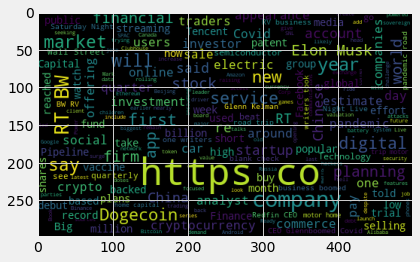

In [13]:
# Word Cloud Visualization
allwords = ' '.join([i for i in df['Tweets']])
Cloud = WordCloud(width = 500, height = 300, random_state = 0, max_font_size = 50).generate(allwords)

plt.imshow(Cloud)
plt.show()

In [14]:
# create a funtion to compute negative, neutral and positive 

def gteAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(gteAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Market Pricing in Short Disruption From Pipeli...,0.300000,0.000000,Neutral
1,Forty-four attorneys general sent a letter to ...,0.500000,0.050000,Positive
2,IT firm AgileThought has reached a deal with a...,0.400000,-0.200000,Negative
3,"Babel Finance, a Chinese startup offering fina...",0.000000,0.000000,Neutral
4,Amazon is selling bonds to refinance debt and ...,0.244444,0.116667,Positive
...,...,...,...,...
95,RT : The Bloomberg New Economy Advisory Board ...,0.454545,0.136364,Positive
96,Calls return to revoke the legal shield that p...,0.133333,0.116667,Positive
97,RT @BW: The RV business boomed during Covid. S...,0.000000,0.000000,Neutral
98,With the chip shortage stretching into its fif...,0.475000,-0.050000,Negative


In [15]:
df['Analysis'].value_counts()

Positive    46
Neutral     38
Negative    16
Name: Analysis, dtype: int64

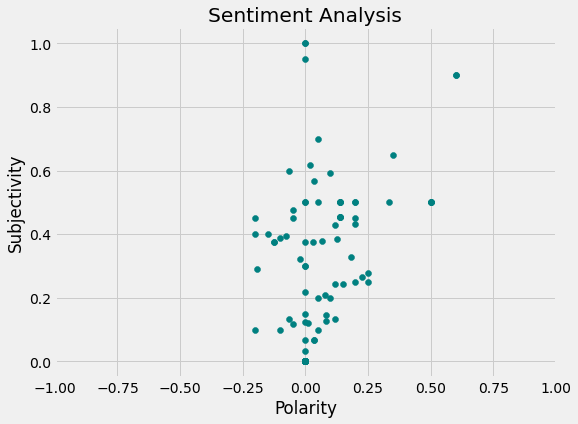

In [16]:
# plotting the scatter plot
plt.figure(figsize = (8,6))

for i in range (0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color = 'Teal')

plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [17]:
df[df['Analysis']=='Neutral']

,Tweets,Subjectivity,Polarity,Analysis
0,Market Pricing in Short Disruption From Pipeli...,0.300000,0.0,Neutral
3,"Babel Finance, a Chinese startup offering fina...",0.000000,0.0,Neutral
6,Sports streaming service DAZN had the biggest ...,0.066667,0.0,Neutral
9,Binance briefly suspended withdrawals from the...,0.216667,0.0,Neutral
14,Wall Street warns of potential froth in digita...,0.500000,0.0,Neutral
15,Mercedes-Benz gives a look at an electric van ...,0.000000,0.0,Neutral
17,Sony warns a group of analysts the PlayStation...,0.300000,0.0,Neutral
18,Beijing slaps fines on tutoring apps backed by...,0.000000,0.0,Neutral
20,The Covid-19 pandemic led to a surge in malici...,0.000000,0.0,Neutral
23,Here's how to tell the difference between Bitc...,0.000000,0.0,Neutral


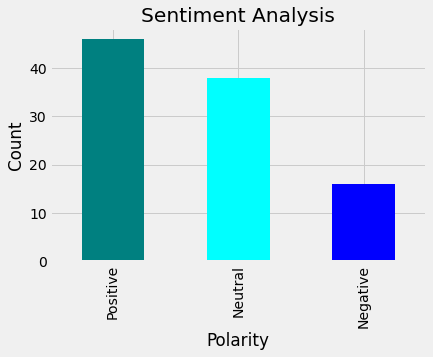

In [22]:
# bar graphs

df['Analysis'].value_counts().plot(kind='bar',color=['teal', 'cyan', 'blue'])
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()